#**Computer Vision Assignment**

---


###**Objective 1:** Count the number of rice grains in the Image.
###**Objective 2:** Find the number of broken grains in the image.


##**About Images**

● The background will always be blue.

● There will be a mix of broken and non-broken rice grains.

● The grains will not overlap but can touch each other.


#**Computer Vision Assignment**

###**Sample Image:**

--> You can assume the following in the image:

--> 1. The background will always be blue.

--> 2. There will be a mix of broken and non-broken rice grains.

--> 3. The grains will not overlap but can touch each other.

###**Suggestions for Solution:**

--> Feel free to use any image processing techniques, libraries, external data.

--> Try OpenCV based techniques.

--> Try to solve the cases where grains touching each other.

--> Try some neural network based approaches to segmentation and classification


##**Submission FIle Format:**

###**Should be submitted as a CSV file.**

--> At least one of total_rice_grain and total_broken_rice_grain columns should be filled for the submission to be valid.

###**Submissions Instructions:**

--> Share the complete code along with the submission file.

--> Provide a detailed write-up explaining the work, visualizations of the result, current limitations, and next steps on how to improve the algorithm.

-->  Our main objective is to find the all rice grains and count them, how much total rice are available in the given image and total broken rice grains.


###Steps to Detect the rice grains:

	--> We need to import all required libraies.

	--> then load the images what we need to process and work with that.

			--> we should know how much files in the folder.

			--> must get the total count of the files(This is used for the test images)
			
			--> Then read the image with for loop

	--> define a function called count_rice_grains.

			--> def count_rice_grains(pictures, total_rice, total_broken):

	--> put the input as our images to find the total number of grains.

	--> we should convert the image into grayscale, blured image, then

		--> img=cv2.cvtColor(pictures, cv2.COLOR_BGR2RGB)
		--> gray = cv2.cvtColor(pictures, cv2.COLOR_BGR2GRAY)
		--> ret, thresh_img = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

	--> Use the morphology to find the objects in the given images.

		--> kernel = np.ones((3),np.uint8)
		--> clear_img = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)
		--> plt.figure(figsize=(15,15))

	--> copy the cleaned images into put the label.

		--> label_img = clear_img.copy()
			count = 0
  

	--> get the shape of the objects value into rows and columns.

				rows, cols = label_img.shape
	
	--> then process the rows and columns and count the pixels.

			--> for i in range(rows):
    				for j in range(cols):
      				pixel = label_img[i, j]
      				if 255 == pixel:
        				count = count + 1
        				cv.floodFill(label_img, None, (j, i), count)

	--> put them a color for the labelled images.

			--> rgb = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
	
	--> find the maximum distance and minimum distance of each and every grains.

			--> max = feature.peak_local_max(dist_trans, min_distance=23)
			--> max_mask = np.zeros(dist_trans.shape, dtype=bool)

	--> plot the processed images.

	--> count the individual objects when we find the grains in images.

			--> total_rice = labels.max()
			
			--> total_broken = len(count)

	--> then we process for the broken rice grains, count that and display the results what we expected.

	--> create a submission.csv file to store the finding values, named file_name, total_rice_grains and total_broke_rice_grains.

		--> 1. import os -- for creating a file.

		--> 2. write a code for create a csv and path

		--> 3. Using DictWriter: The fieldnames parameter is a sequence of keys that identify the order in which values in the dictionary passed to the writerow() method are written to file

	--> move these file to github to submit the assignment what we are got from the placement.

###Overall simple process is:

1 import required libraries

2 load the file

3 image preprocessing:

4.convert the images into grayscale, noise remove, 

5.count the number of rice grains in the image.

6.Find the number of broken grains in the image.
 


##Objective 1: Count the number of rice grains in the Image.

##Objective 2: Find the number of broken grains in the image.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Importing all required libraries

In [73]:
import numpy as np 
from matplotlib import pyplot as plt
import cv2
import cv2 as cv
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import filters, feature, measure, color
from skimage.segmentation import watershed
from google.colab.patches import cv2_imshow
import os
import csv
from google.colab.patches import cv2_imshow
from sys import argv
from PIL import Image

In [ ]:
def count_rice_grains(pictures, total_rice, total_broken):

  img=cv2.cvtColor(pictures, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(pictures, cv2.COLOR_BGR2GRAY)

  ret, thresh_img = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

  kernel = np.ones((3),np.uint8)
  clear_img = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations=8)
  plt.figure(figsize=(15,15))
  
  label_img = clear_img.copy()
  count = 0
  rows, cols = label_img.shape

  for i in range(rows):
    for j in range(cols):
      pixel = label_img[i, j]
      if 255 == pixel:
        count = count + 1
        cv.floodFill(label_img, None, (j, i), count)

  (cnt, hierarchy) = cv2.findContours(label_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

  dist_trans = ndimage.distance_transform_edt(clear_img)

  max = feature.peak_local_max(dist_trans, min_distance=23)
  max_mask = np.zeros(dist_trans.shape, dtype=bool)
  max_mask[tuple(max.T)] = True
  labels = watershed(-dist_trans, measure.label(max_mask), mask=clear_img)

  plt.figure(figsize=(30,10))
  plt.imshow(rgb)
    
  count = []
  for x in cnt:
    area = cv.contourArea(x)
    if area > 100 and area < 1500:
      count.append(x)
  
  total_rice_grains = labels.max()
  
  total_broken_rice_grains = len(count)
   
  print("Number of Rice grains are : ", total_rice_grains, "Number of broken rice grains in images: ", total_broken_rice_grains)

  total_rice.append(total_rice_grains) #total_rice = total_rice_grains
  
  total_broken.append(total_broken_rice_grains)
  #total_broken = total_broken_rice_grains


Number of Rice grains are :  586 Number of broken rice grains in images:  139
Number of Rice grains are :  602 Number of broken rice grains in images:  220
Number of Rice grains are :  618 Number of broken rice grains in images:  265
Number of Rice grains are :  695 Number of broken rice grains in images:  406
Number of Rice grains are :  704 Number of broken rice grains in images:  100


<Figure size 1080x1080 with 0 Axes>

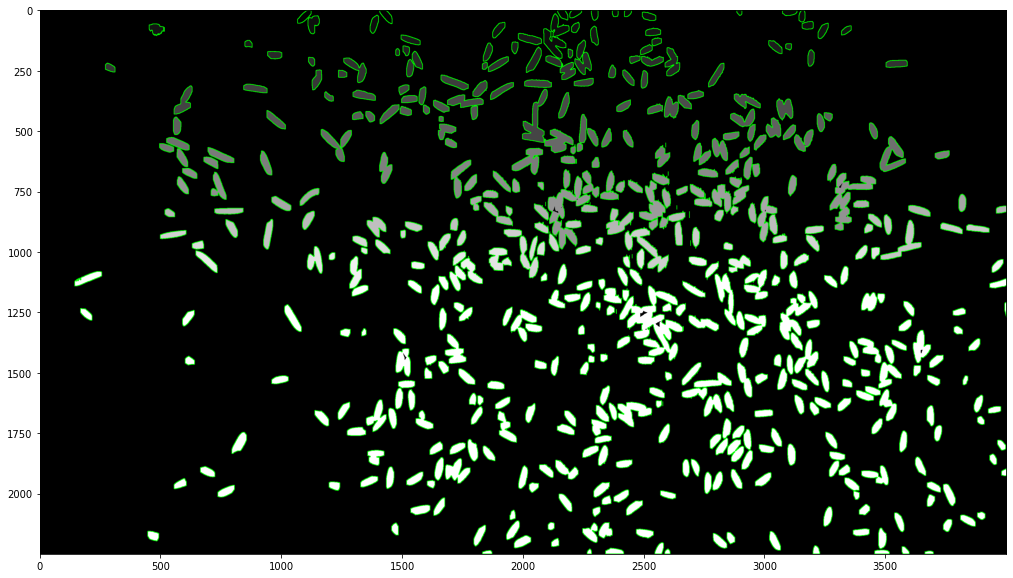

<Figure size 1080x1080 with 0 Axes>

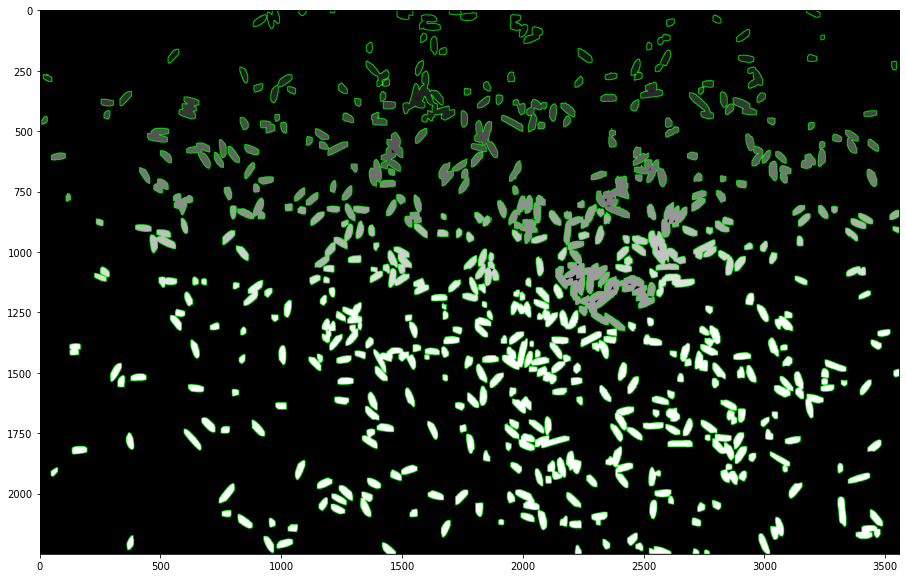

<Figure size 1080x1080 with 0 Axes>

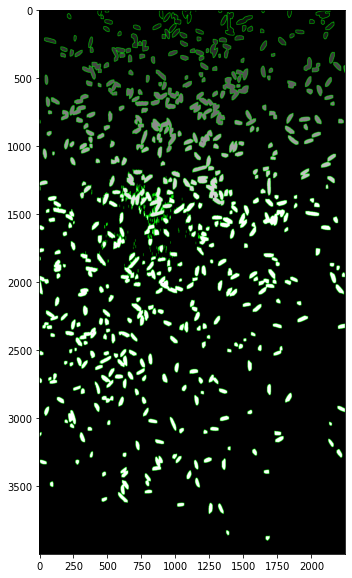

<Figure size 1080x1080 with 0 Axes>

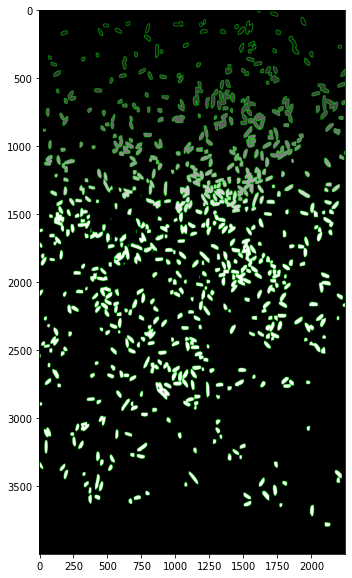

<Figure size 1080x1080 with 0 Axes>

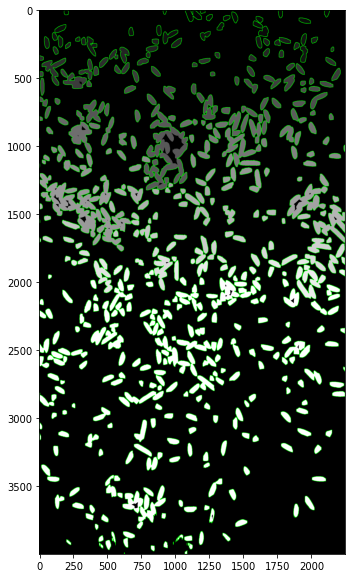

In [ ]:
#Display the images which processed the functions
file_count = sum(len(files) for _, _, files in os.walk(r'/content/drive/MyDrive/Akaike/Computer vision Assignment/Test/'))

with open('/content/drive/MyDrive/Akaike/Computer vision Assignment/submission.csv', 'w', newline='', encoding='utf8') as file:
  fieldnames = ['file_name', 'total_rice_grain', 'total_broken_rice_grain']
  writer = csv.DictWriter(file, fieldnames=fieldnames)
  writer.writeheader()
  for i in range(1, file_count+1):
    total_rice = []
    total_broken = []
    img = cv2.imread(f"/content/drive/MyDrive/Akaike/Computer vision Assignment/Test/image_{str(i)}.jpg")
    count_rice_grains(img, total_rice, total_broken)
    writer.writerow({'file_name':f'image_{str(i)}.jpg', 'total_rice_grain': total_rice, 'total_broken_rice_grain': total_broken})




#**Suggestions for Solution:**

● Feel free to use any image processing techniques, libraries, external data.

● Try OpenCV based techniques.

● Try to solve the cases where grains touching each other.

● Try some neural network based approaches to segmentation and classification



#**It tried to solve the problems.**


####--> In CV based techniques, I used some technology.

####--> I know there is a lot of technology involved. All about it can be learned through experience.


####--> I hope we can learn this experience from your company.

####--> I may have omitted many of these. I think there is no understanding of it.

####--> There is no such thing as difficult. It would be even better if we got more time to know about it.

####--> I tried to solve about the rice grains touching each other.

####--> For now trying to solve the problem I can figure it out and it will take some time to resolve, hopefully I can get it done.

####--> I was not aware of neural network.

####--> Incase, if i try the neural network and it all went wrong entirely. that's why i not even trying that part.

####--> I have tried to solve as much as I can.

####--> For solving problems, I look at the reference from outside and fixed it as much as I can.

